# 이미지 불러오기

In [1]:
import cv2 #openCV
import matplotlib.pyplot as plt #matplotlib

In [5]:
im_name='image.jpeg'
image=cv2.imread(im_name)
# 해당 위치에 있는 이미지 파일을 openCV를 통해 읽어 드림.

image
# 읽어드린 이미지 데이터는 BGR 채널의 데이터 형태로 출력.

[[[231 154 105]
  [231 154 105]
  [231 154 105]
  ...
  [200 153 121]
  [199 152 120]
  [199 152 120]]

 [[231 154 105]
  [231 154 105]
  [231 154 105]
  ...
  [200 153 121]
  [198 151 119]
  [196 149 117]]

 [[231 154 105]
  [231 154 105]
  [231 154 105]
  ...
  [201 154 122]
  [199 152 120]
  [197 150 118]]

 ...

 [[226 179 151]
  [226 179 151]
  [229 183 152]
  ...
  [248 196 155]
  [249 197 156]
  [250 198 157]]

 [[223 178 151]
  [223 179 150]
  [225 181 150]
  ...
  [249 197 156]
  [251 197 156]
  [252 198 157]]

 [[221 176 149]
  [220 176 147]
  [223 179 150]
  ...
  [250 198 157]
  [253 199 158]
  [254 200 159]]]


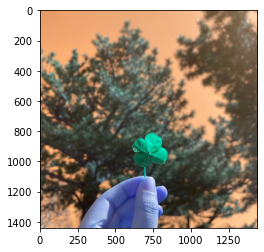

In [6]:
plt.imshow(image)
# 원본 이미지와 색상이 다름.
# openCV에서 읽어드린 이미지는 RGB가 아닌 BGR 형식이기에

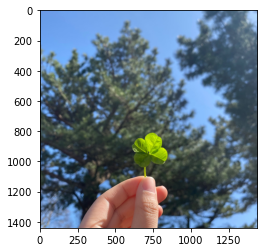

In [7]:
image_rgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# BGR 채널 이미지 데이터를 RGB채널 이미지 데이터로 변환.

plt.imshow(image_rgb)

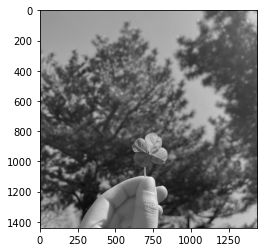

In [10]:
image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# BGR 채널 이미지 -> gray-scale 채널 이미지 변환.

plt.imshow(image_gray, cmap='gray')

# matplotlib image visualize 그리고 figure와 axs 사용.

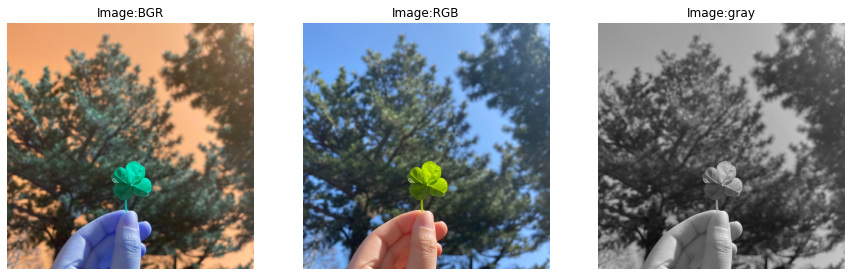

In [13]:
plt.figure(figsize=(15,8))
# 피규어 사이즈 정함.

plt.subplot(1,3,1)
# (행, 열, 인덱스)
plt.imshow(image)
plt.axis('off')
# 축들을 없앰.
plt.title('Image:BGR')
# 제목 달기.

plt.subplot(1,3,2)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Image:RGB')

plt.subplot(1,3,3)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Image:gray')

plt.show()

# matplotlib 추가예시

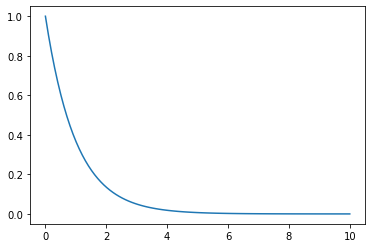

In [16]:
# 라인 플롯
import numpy as np
a=np.linspace(0,10,100)
# (시작 숫자, 끝 숫자, n개의 요소).
b=np.exp(-a)
# 자연상수 e의 지수함수 형태- e^-a.
plt.plot(a,b)
plt.show()

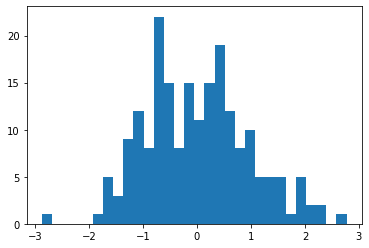

In [20]:
# 히스토그램
from numpy.random import normal, rand
x=normal(size=200)
# 데이터 수가 200개인 정규분포 데이터.
plt.hist(x, bins=30)
# bins-히스토그램상의 칸수 지정. 
plt.show()

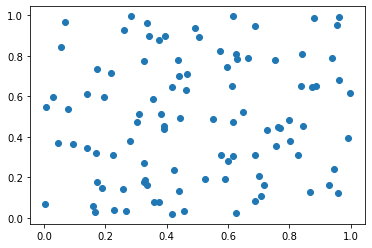

In [21]:
# scatter
a=rand(100)
# 100개의 난수를 만듦.
b=rand(100)

plt.scatter(a,b)
# a와 b 데이터를 x, y축 그래프에 흩뿌림.
plt.show()

C:\Users\unione\anaconda3\envs\pracCNN\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


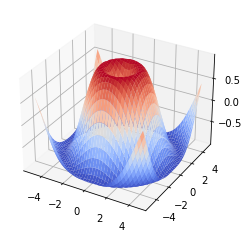

In [22]:
# 3D 플롯
from matplotlib import cm
fig=plt.figure()
ax=fig.gca(projection='3d')
# figure를 3d 형태로 지정.

X=np.arange(-5,5,0.25)
# (시작숫자, 끝숫자, 스텝)
Y=np.arange(-5,5,0.25)

X, Y=np.meshgrid(X,Y)
#  행단위와 열단위로 각각 해당 배열을 정방(square) 행렬로 선언
R=np.sqrt(X**2+Y**2)
# sqrt : 제곱근
Z=np.sin(R)

surf=ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.coolwarm)
plt.show()


# image cropping

In [26]:
# 이미지 불러 RGB 데이터로 변환하는 함수.

def read_image(im_name):
    image=cv2.imread(im_name)
    image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
    return image_rgb


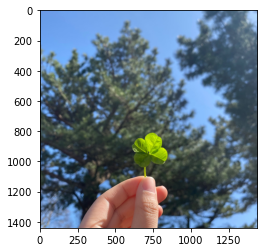

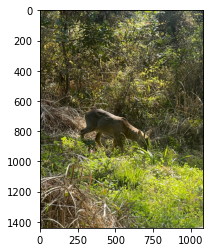

In [27]:
im1=read_image('image.jpeg')
im2=read_image('image2.jpeg')

In [29]:
print(im1.shape, im2.shape)
# 이미지 데이터의 행(높이), 열(가로), 채널수

(1440, 1440, 3) (1440, 1080, 3)


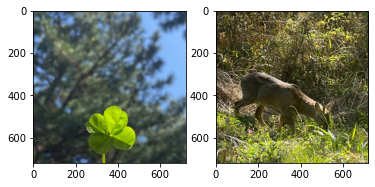

In [31]:
h1, w1=im1.shape[:2]
# 이미지 데이터의 높이와 가로 크기 가져옴.

h2, w2=im2.shape[:2]

def center_crop(im, h, w, size=720):
    im=im[int(h/2-size/2):int(h/2+size/2), int(w/2-size/2):int(w/2+size/2)]
#     이미지 데이터 인덱싱하여 특정부분을 가져옴.
    return im

im1=center_crop(im1,h1,w1)
im2=center_crop(im2,h2,w2)

def two_image_show(im1,im2):
    plt.subplot(1,2,1)
    plt.imshow(im1)
    plt.subplot(1,2,2)
    plt.imshow(im2)
    plt.show()
two_image_show(im1,im2)

# image masking

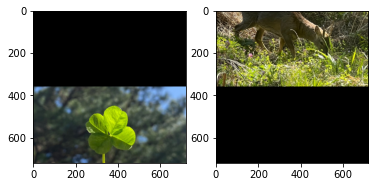

In [41]:
size=720
im1_mask=np.zeros_like(im1)
# im1 사이즈의 0으로 이루어진 형태-검은색 2차원 평면.
im1_mask[int(size/2):,]=im1[int(size/2):,]
# mask의 특정 부분(행기준)에 이미지1 데이터의 특정부분 삽입.

im2_mask=np.zeros_like(im2)
im2_mask[:int(size/2),]=im2[int(size/2):,]

two_image_show(im1_mask,im2_mask)

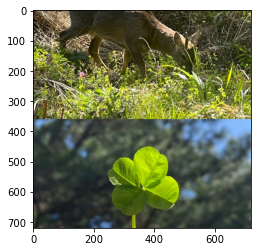

In [43]:
merge=cv2.bitwise_or(im1_mask,im2_mask)
# 두 마스크 병합.
plt.imshow(merge)
plt.show()

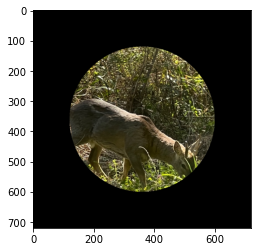

In [45]:
# circle mask
circle_mask=np.zeros_like(im2)
cv2.circle(circle_mask,(size//2,size//2),size//3,(255,255,255),-1)
# 해당 마스크에 원을 만듦-(대상이미지,(원점x,원점y),반지름,(색상),채우기)

masked_im2=cv2.bitwise_and(im2,circle_mask)
# and 연산으로 circle masking
plt.imshow(masked_im2)

In [47]:
plt.imsave('circle_mask.png', masked_im2)
# 해당 이미지 저장.

# image matching

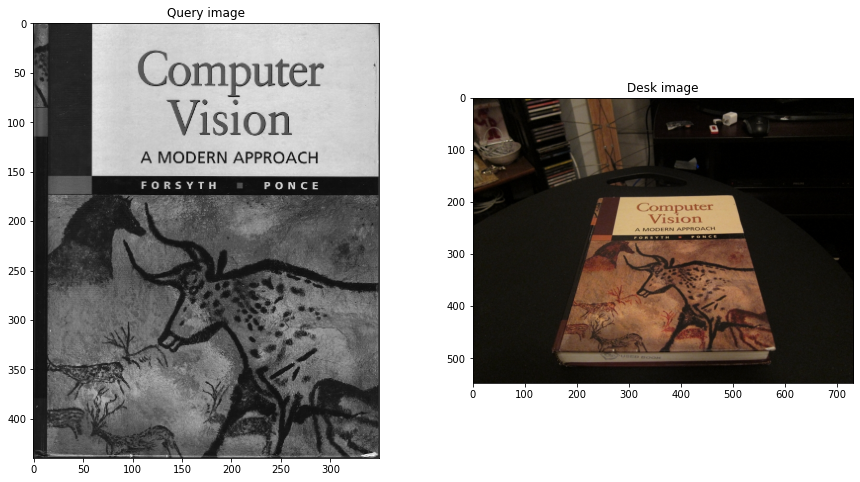

In [50]:
import cv2 as cv

queryImage= 'cv_cover.jpg'
trainImage='cv_desk.png'


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(cv.imread(queryImage), cv.COLOR_BGR2RGB))
plt.title('Query image')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(cv.imread(trainImage), cv.COLOR_BGR2RGB))
plt.title('Desk image')
plt.show()

img1 = cv.imread(queryImage,cv.IMREAD_GRAYSCALE)         
img2 = cv.imread(trainImage,cv.IMREAD_GRAYSCALE) 

In [52]:
orb=cv.ORB_create()
# feature matching 알고리즘.

In [53]:
# ORB로 키포인트와 디스크립션 찾음.
kp1, des1=orb.detectAndCompute(img1,None)
kp2,des2=orb.detectAndCompute(img2,None)


In [54]:
# BF 매쳐 객체 생성.
bf=cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# 디스크립션 매칭
matches=bf.match(des1, des2)

# 그들의 디스턴스에 따라서 정렬.
matches=sorted(matches, key=lambda x:x.distance)


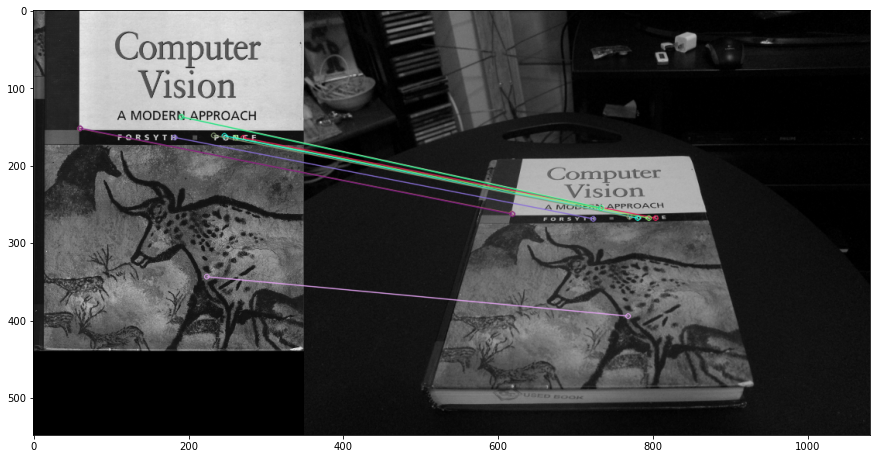

In [55]:
# matches는 opencv의 클래스로 리턴되기에 시각화 할 수 있게 drawMatches를 통해 시각화.

img3=cv.drawMatches(img1,kp1,img2,kp2,matches[:10], None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()

# Additional part: Find homography and warping

In [56]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

h, mask = cv.findHomography(points1, points2, cv.RANSAC)

height, width = img2.shape

im1_warped = cv.warpPerspective(img1, h, (width, height))

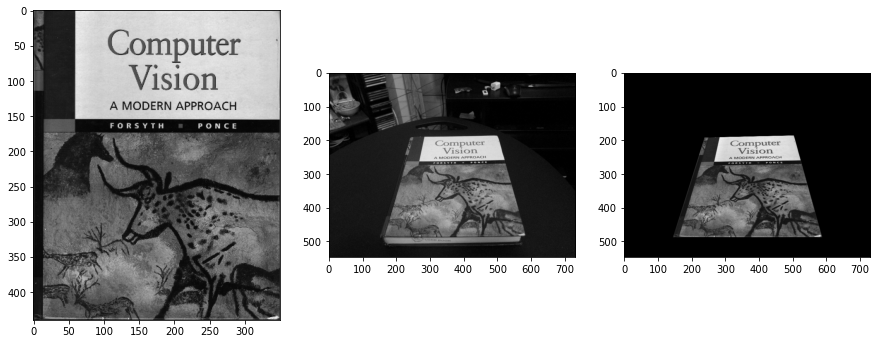

In [57]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(im1_warped, cmap='gray')
plt.show()

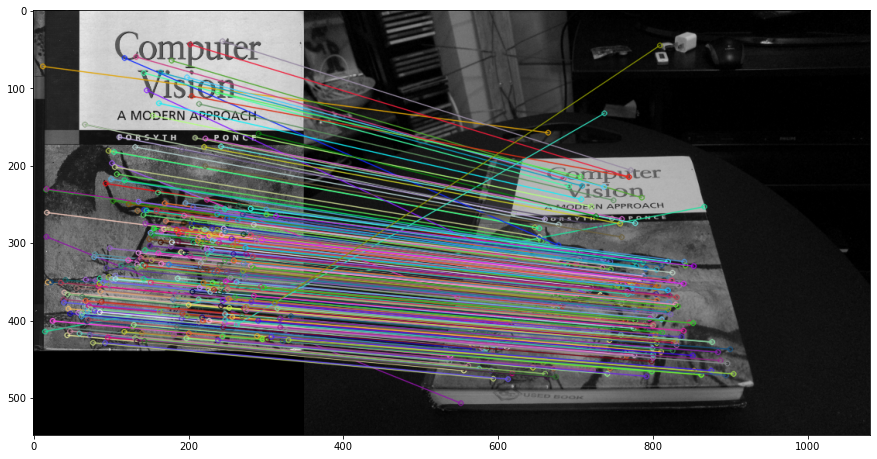

In [58]:
# SIFT 감지기 시작
sift = cv.SIFT_create()
# SIFT로 키포인트와 디스크립터 찾기
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher 기본 매개변수 사용
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# 비율 테스트 적용
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn은 목록을 일치로 예상.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()